# Analyzing covid19

![JMU logo](https://jmusports.com/images/2020/7/7/JMU.png?width=2000)

COVID-19, flu (influenza), and RSV (Respiratory Syncytial Virus) are all contagious respiratory illnesses but are caused by different viruses.

Data source: [Eurpoean Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

Author: 

Email:

In [10]:
%matplotlib inline
import pandas as pd

In [6]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [4]:
import matplotlib.pyplot as plt

## 3.1 - top 5 rows

In [5]:
df= pd.read_excel('s3://wootten-241-2023-python/covid_data.xls')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## 3.2 - Number of cases per day

/tmp/ipykernel_11090/1118466642.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dateRep'] = pd.to_datetime(df['dateRep'])


<AxesSubplot: xlabel='dateRep'>

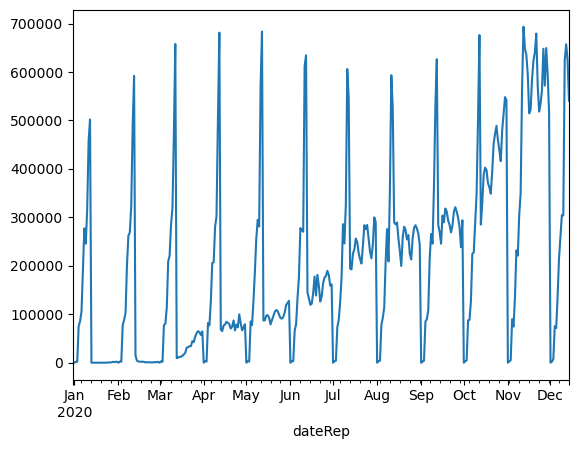

In [7]:
df['dateRep'] = pd.to_datetime(df['dateRep'])

sum_death_by_date = df.groupby('dateRep')['cases'].sum()
sum_death_by_date.plot()

More cases in November and December

## 3.3 - Top 10 Countries with the Highest Deaths

<AxesSubplot: xlabel='countriesAndTerritories'>

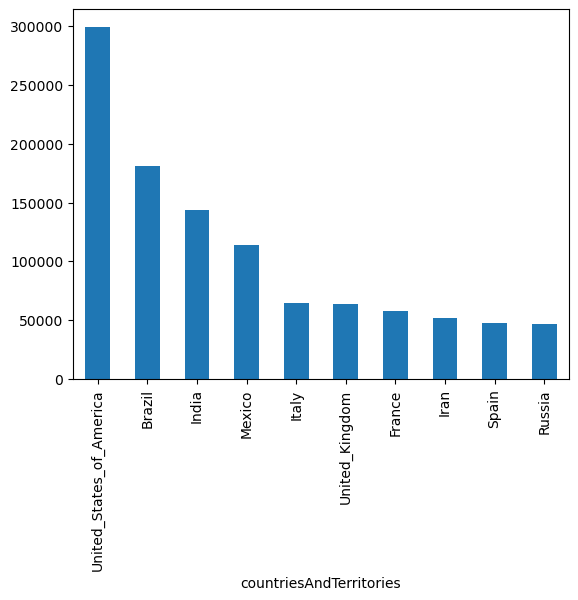

In [8]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum()
sum_death_by_country.nlargest(10).plot.bar()

The United States had the highest death count, followed by Brazil and India

## 3.4 - List of unique countries and territories

In [12]:
pd.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## 3.5 - Select the data

In [24]:
italy_data = df.loc[df['countriesAndTerritories'] == 'Italy']
italy_data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
29099,2020-12-14,14,12,2020,17937,484,Italy,IT,ITA,60359546.0,Europe,428.323301
29100,2020-12-13,13,12,2020,19902,649,Italy,IT,ITA,60359546.0,Europe,432.811406
29101,2020-12-12,12,12,2020,18726,761,Italy,IT,ITA,60359546.0,Europe,443.436072
29102,2020-11-12,11,12,2020,16998,887,Italy,IT,ITA,60359546.0,Europe,459.367272
29103,2020-10-12,10,12,2020,12755,499,Italy,IT,ITA,60359546.0,Europe,479.253108


## 3.6 - How the Number of Cases is Related to the Number of Deaths in Italy

<AxesSubplot: xlabel='cases', ylabel='deaths'>

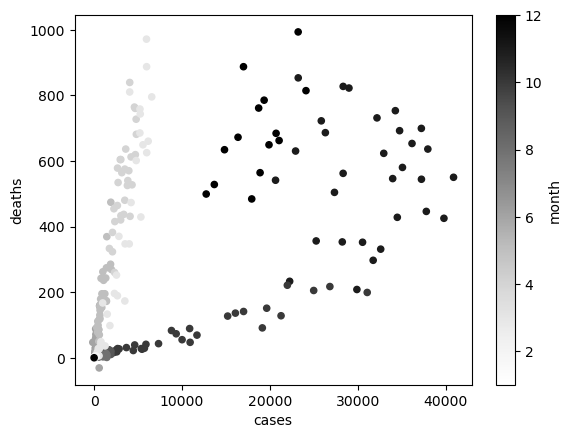

In [23]:
italy_data.plot.scatter(x='cases',y='deaths',c= 'month')

Especially in the first few months, cases were relatively low, but deaths were high. Over time, cases started to progress along with deaths.